# ImageNet Classification with Deep Convolutional Neural Networks(AlexNet) - 2012

이 논문이 AlexNet라 불리는 이유 -> 주 저자 이름이 Alex Krizhevsky라서



# ImageNet 분류를 위한 깊은 합성곱 신경망

## 저자
- Alex Krizhevsky, 토론토 대학교
- Ilya Sutskever, 토론토 대학교
- Geoffrey E. Hinton, 토론토 대학교

## 요약
이 논문에서는 ImageNet LSVRC-2010 대회의 1.2백만 고해상도 이미지를 1000개의 다양한 클래스로 분류하기 위해 대규모 깊은 합성곱 신경망을 훈련시킨 연구를 다룹니다. top-1 오류율 37.5%, top-5 오류율 17.0%를 달성하며, 이는 이전의 최고 기록을 크게 개선한 결과입니다.

### 네트워크 구조
- **매개변수와 뉴런**: 6000만 개의 매개변수와 650,000개의 뉴런.
- **구성**: 5개의 합성곱 층, 3개의 완전 연결 층, 1000-way 소프트맥스 출력 층.
- **활성화 함수**: ReLU (비포화 활성화 함수 사용).
- **과적합 방지**: 과적합을 방지하기 위해 드롭아웃과 데이터 증강 기법을 사용.

### 학습 속도 및 효율성 향상
- **GPU 최적화**: 합성곱 연산의 효율성을 증대시키기 위해 고도로 최적화된 GPU 구현 사용.
- **이중 GPU 사용**: 네트워크 크기 관리 및 병렬 처리 개선.

### 합성곱 네트워크의 이점
- **이미지에 대한 가정**: 이미지의 통계적 정상성과 픽셀 의존성의 지역성을 활용.
- **매개변수 및 연결 최소화**: 이론적으로 최적의 성능을 유지하면서 연결과 매개변수를 훨씬 적게 사용하여 훈련을 더 효율적으로 만듦.

### 과적합 감소 기법
- **데이터 증강**: 이미지 변환과 RGB 채널의 강도 변화를 통해 데이터셋을 확장.
- **드롭아웃**: 훈련 중 무작위로 뉴런을 비활성화하여 공동 적응을 방지하고 과적합을 줄임.

### 성능 결과
- **ILSVRC-2010**: top-1 오류율 37.5%, top-5 오류율 17.0% 달성.
- **ILSVRC-2012**: 참가하여 높은 성능을 달성함.

이 논문은 컴퓨터 비전과 딥러닝 분야에서 중요한 기여를 하며, 대규모 이미지 데이터셋에서 객체 인식의 성능을 크게 향상시킬 수 있는 깊은 합성곱 신경망의 가능성을 보여줍니다.


## Abstract

LSVRC-2010 대회 출전용 논문 -> 120만개의 이미지 -> 1000개의 클래스화 -> CNN(convolutional neural network)으로 훈련
실험결과 -> 오류율이 37.5%, 17.0%
모델의 변형버전 -> LSVRC-2012 출전 -> 15.3%의 오류율

나머지는 귀찮으니 블로그 정리글 퍼옴

# 1. AlexNet 구조

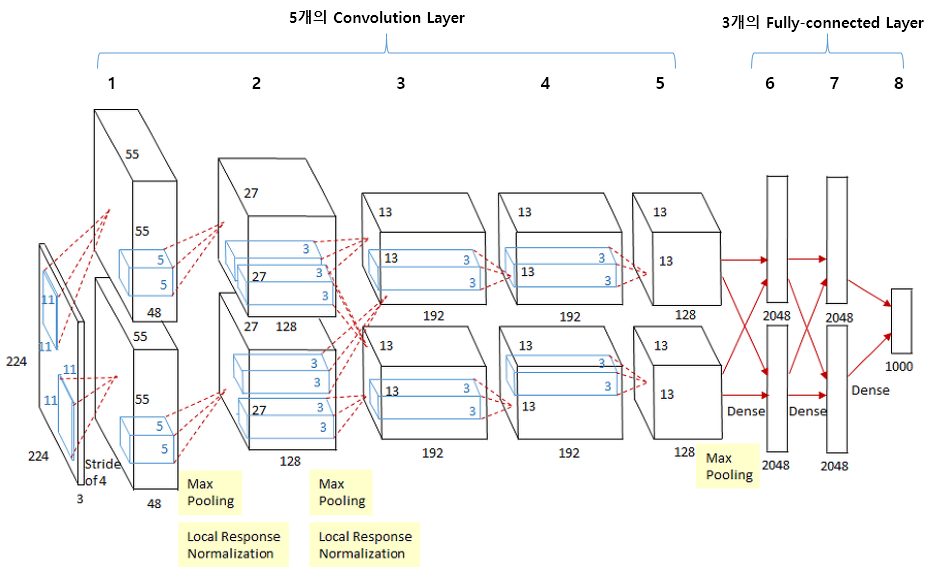

8개의 레이어로 구성 -> 5개의 CNN / 3개의 FCN

- 입력 이미지 : 227 x 227 x 3 의 RGB 이미지
(논문에서는 224로 표기되어 잇으나 잘못된 것)


# 1.1 1st 레이어(CNN)

- **필터**: 96개의 11 x 11 x 3 크기 필터를 이용해 입력 영상을 합성곱.
- **스트라이드**: 스트라이드(stride)는 4로 설정하며, zero-padding은 사용하지 않음.
- **출력 크기**: 합성곱 결과는 55 x 55 x 96 크기의 특성 맵(feature map)을 생성.
- **맥스 풀링**: 3 x 3 겹치는(max pooling) 영역과 2의 스트라이드를 사용해 27 x 27 x 96 크기의 특성 맵으로 축소.
- **정규화**: Local Response Normalization을 적용해 27 x 27 x 96 크기의 최종 특성 맵 생성.
- **ReLU 활성화 함수**: ReLU 활성화 함수를 적용하여 비선형 변환.


## 1.2 2nd 레이어(CNN)

- **필터**: 128개의 5 x 5 x 48 크기 필터를 두번 사용함
- **인자(Argument)**: Stride =1, zero-padding = 2로 설정
- **출력 크기** : 27 x 27 x 256 특성맵 출력
- **활성화 함수** : ReLU사용
- **맥스 풀링** : 3 x 3 overlapping max pooling을 stride 2로 시행
- **풀링 후 정규화** : 맥스 풀링 후 13 x 13 x 256 특성맵을 ocal Response Normalization 적용 -> 특성맵 크기는 유지

## 1.3 3rd 레이어(CNN)

- **필터**: 384개의 3 x 3 x 256 크기 필터를 두번 사용함
- **인자(Argument)**: Stride =1, zero-padding = 1로 설정
- **출력 크기** : 13 x 13 x 384 특성맵 출력
- **활성화 함수** : ReLU사용

## 1.4 4rd 레이어(CNN)

- **필터**: 192개의 3 x 3 x 192 크기 필터를 두번 사용함
- **인자(Argument)**: Stride =1, zero-padding = 1로 설정
- **출력 크기** : 13 x 13 x 384 특성맵 출력
- **활성화 함수** : ReLU사용

## 1.5 5rd 레이어(CNN)

- **필터**: 128개의 3 x 3 x 192 크기 필터를 두번 사용함
- **인자(Argument)**: Stride =1, zero-padding = 1로 설정
- **출력 크기** : 13 x 13 x 256 특성맵 출력
- **활성화 함수** : ReLU사용
- **맥스 풀링** : 3 x 3 overlapping max pooling을 stride 2로 시행
- **최종 출력 크기** : 6 x 6 x 256 특성맵 출력

## 1.6 6rd 레이어(FCN)

- **flatten 과정** : 6 x 6 x 256 특성맵에 flatten을 적용해 9216의 1차원 벡터 생성
- **FCN과정** : 4096개의 뉴런과 FC
- **활성화 함수** : ReLU사용

# 1.7 7rd 레이어(FCN)

- **네트워크 구성** : 4096 뉴런 구성
- **활성화 함수** : ReLU사용

# 1.8 8rd 레이어(FCN)

- **flatten 과정** : 1000개의 뉴런
- **활성화 함수** : softmax 함수를 적용하여 1000개의 클레스에 속할 확률 출력


# 논문의 주요 챕터별 알아야 할 내용들 추가 정리

## 1. Introduction

객체 인식의 대회나 기타 여러 작업에 있어 데이터셋을 만드는데 이 '데이터셋'에는 '라벨'을 붙여야함 -> 이미지에 설명을 붙인다 이해하면 됨

여기서 augmentation 라는 개념이 나옴
---
### augmentation 이란?
일단 데이터셋을 모음 -> 각 데이터셋(이미지)에 라벨링 작업을 함

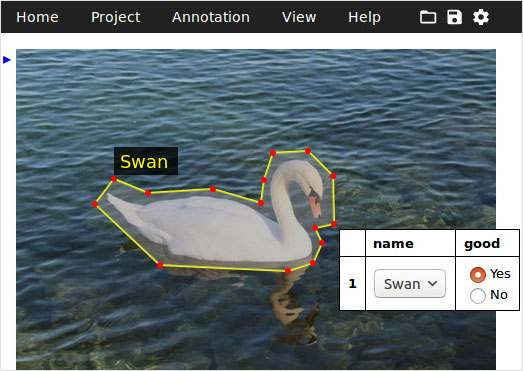

이게 라벨링 작업

이렇게 라벨링 작업을 하는 작업이 만만치 않음 -> 그래서 **Data Augmentation**을 적용함
-> 포토샵으로 살짝 데이터를 변형 시켜서 데이터를 증강시킨다는 거임

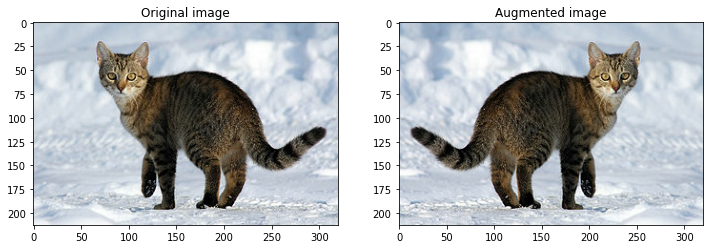

이렇게 좌우 반전 시킨 새로운 이미지를 하나 만들고 이것도 데이터셋으로 활용한다는것
-> 이것의 장점 : 라벨링 정보는 두 이미지가 동일한 이미지이기에 라벨링 작업이 전체 데이터량에 비해 줄어드는 효과가 있음

-> 이것이 실제로 효용 가치가 있는가??
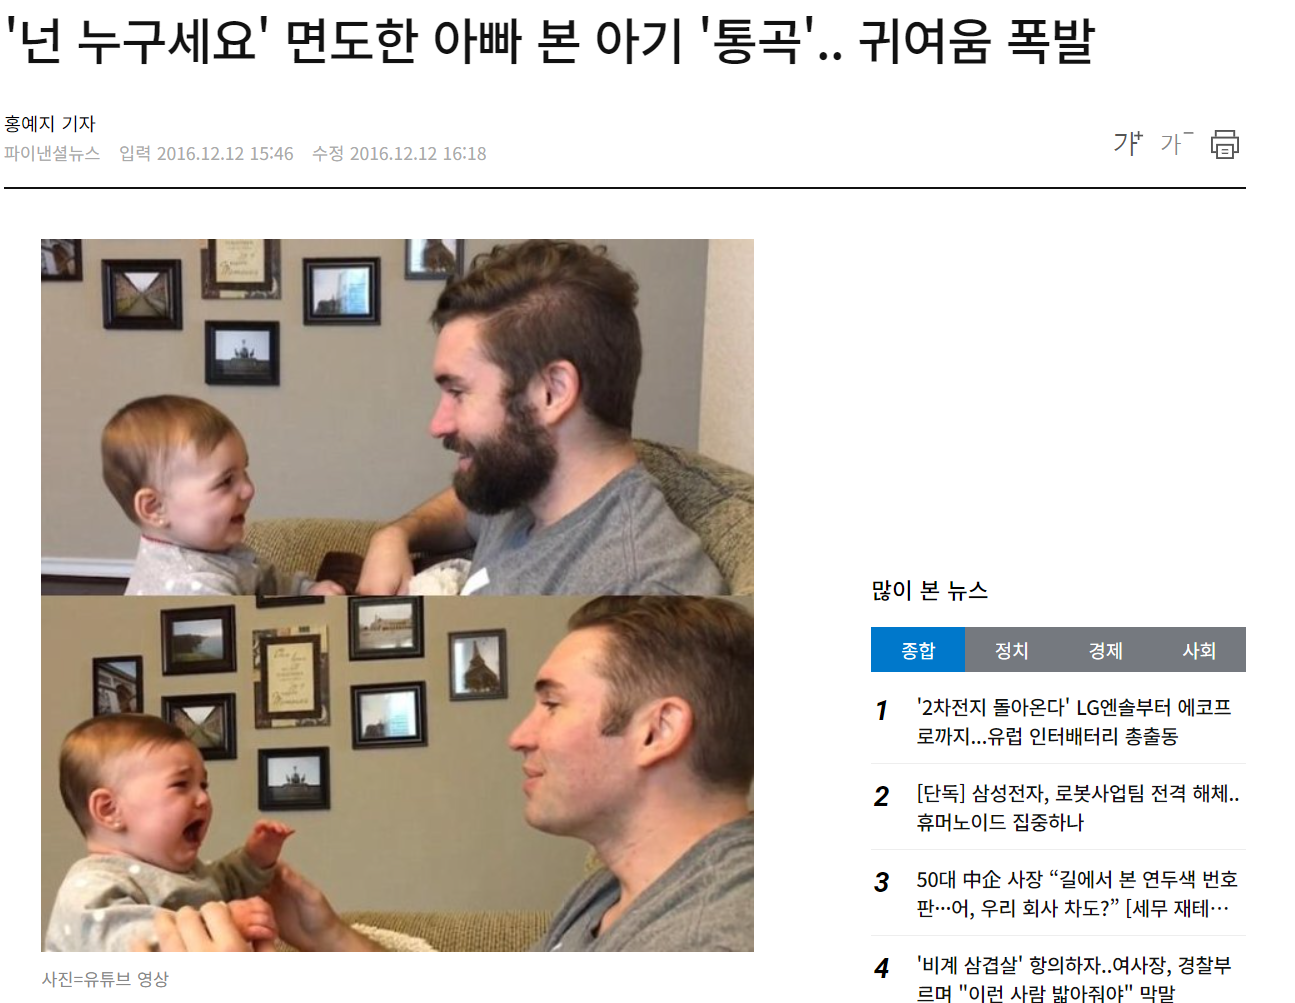

이건 좀 다른 이야기인데 어린 아기의 경우 아빠가 수염을 밀었을 때 자신의 아빠를 인식하지 못하는 문제가 있음
-> 객체 인식 성능이 완료된 일반인은 면도의 유/무에 따라서 동일인을 못알아 보는 경우는 없지만 아기의 경우는 객체 인식 성능이 덜 발달해서 간단한 변조만 발생해도 못알아 보는 경우가 있다는 것임
-> 인간지능으로도 검증된 이론이니 데이터 증강은 확실히 효과가 있다

----

아무튼 이 라벨링 작업이 빡세니 그동안은 augmentation 작업으로 원본 데이터량이 적은 데이터셋(Ex : MNIST)을 써도 무방한 객체 인식 작업을 수행했지만
점점 고도화된 객체 인식 작업을 수행하려면 역시 원본 데이터셋의 양이 절대적으로 많은게 짱짱맨임
-> Ex : ImageNet는 22000 클래스의 1500만장의 라벨 데이터셋

-> 이 데이터셋을 활용한 객체 인식작업을 하려고 AlexNet를 만듬
일단 논문이 나온 시점은 최초의 CNN이 생겨나고 이거로 객체인식 작업이 수행된 시점은 아니고
한 몇년 지나서 CNN을 파생한 다양한 딥러닝 모델이 나오는 시점에 출시된 논문이다

아무튼 논문이 기여한 바는 아래와 같음

1) 이전 CNN대비 더 좋은 성능(ILSVRC-2010과 ILSVRC-2012)
2) 고성능 GPU를 활용한 학습 방법론 소개
3) 모델의 학습(훈련)과 성능을 단축시키기 위한 기법 설명
4) 오버피팅 방지 기법 소개
5) 설계한 모델은 5층의 CNN과 3층의 FCN 총 8층 구조인데 하나만 빠져도 성능이 확연히 떨어짐



## 2. DataSet

일단 객체 인식의 성능지표는 두개로 나뉨 -> top-1 error, top-5 error
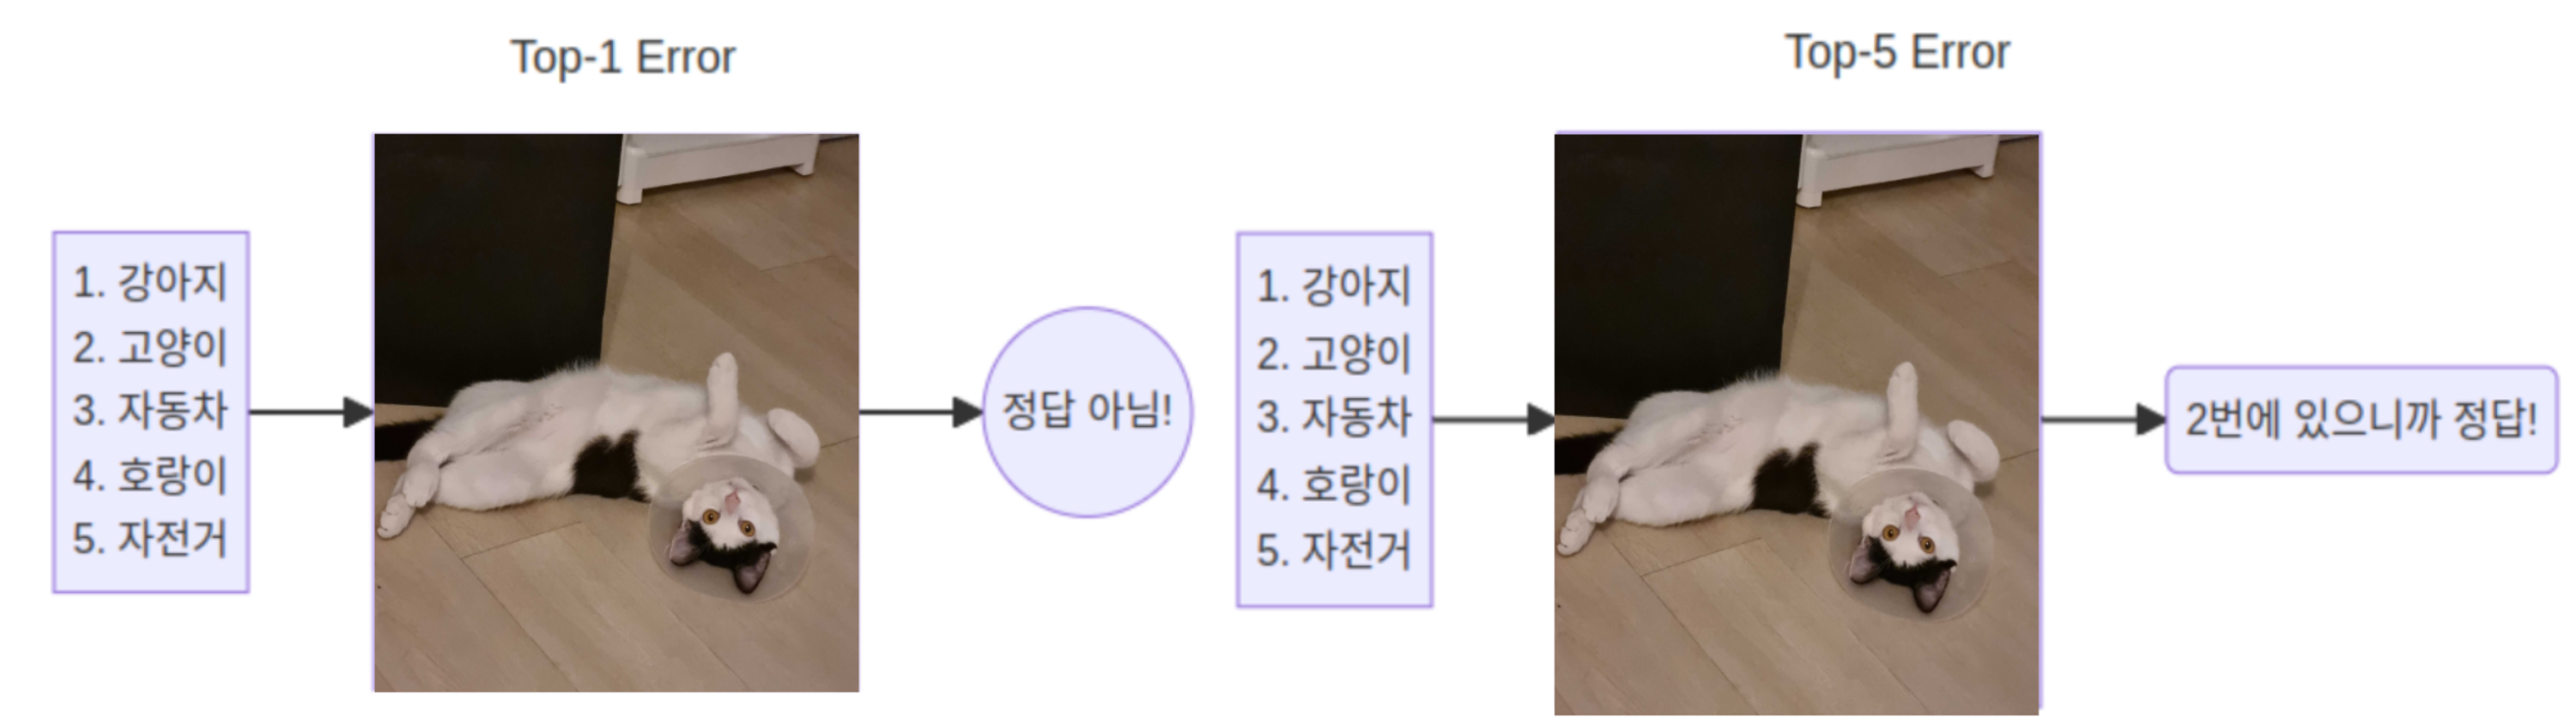

## 3. Architecture

모델 설명은 위에 있으니 넘어가고

### 3.1 ReLU Norlinearity

보통 뉴런을 거친 출력값은 Activation Function으로 한번 더 정제함

#### Activation Function 이란?
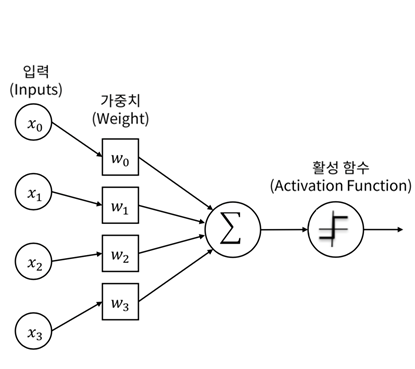

활성화 함수는 위 사진처럼 신경망의 노드에서 들어오는 값들을 다른 레이어로 전달하지 않고 활성화 함수를 통과시켜 전달하는데 그 이유가 비선형 함수로 되어 있는 활성화 함수를 통과시키면
출력값을 변형시킬 때 내가 원하는 출력값은 증폭하고 원하지 않는 출력은 비활성화 시키는게 가능하기 때문

여기서
```
모델의 복잡도를 올리기 위함인데 앞서 다루었던 비선형 문제를 해결하는데 중요한 역할을 한다. 
비선형 문제를 해결하기 위해 단층 퍼셉트론을 쌓는 방법을 이용했는데 은닉층(hidden layer)를 무작정 쌓기만 한다고 해서 비선형 문제를 해결할 수 있는 것은 아니다.
```
이렇게 뭐 어렵게 설명하고 있는데
```
예를 들어 나의 출근 시간을 예측하기 위한 모델(Model)을 구현한다고 가정해보겠습니다.
입력값이 일어난 시간(x1), 기상 상태(x2)라면, 기상 상태(x2)값 보다는 일어난 시간(x1)이 더 영향력이 크다는 것을 직관적으로 알 수 있습니다.
그러므로 연산 과정에서 일어난 시간(x1)은 더 많이 활성화(Activate)되어야 하며, 기상 상태(x2)는 비교적 비활성화(Deactivate) 되어야 합니다.
```

이 과정을 도와주는게 활성화 함수다..
이게 좀더 이해가 편했다.

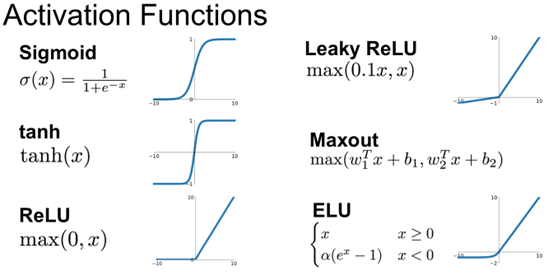

종류는 여러개 있는데
1) Sigmod Func : 이진 분류기 만들때나 쓰며, 기울기 소실문제(vanishing gradient)가 발생한다(X의 값이 4 이상되면 미분치가 0이니까 의미가 없어진다)
또 zero-centered라는 문제도 발생하는데 이 함수를 통과하면 무조건 양수값만 갖기에 역전파 할때 학습시간이 오래걸리게 하는 문제가 발생함
2) Tanh (Hyperbolic Tangent function) : 시그모이드 함수를 개선한건데 여전히 기울기 소실문제가 있음
3) Softmax Function : 이거는 그냥 외워라 -> 클래스에 속할 확률을 계산하는 활성화 함수이므로, 은닉층(Hidden Layer)에서 사용하지 않고 출력층(Output Layer)에서 사용됩니다.
-> 그냥 이 함수는 최종 출력값 낼때 사용하는 함수임

4) Relu 함수 (Rectified Linear Unit function) : CNN은 다 이거씀 -> 이게 다 AlexNet때문인듯
참고로 이 논문은 Tanh 활성화 함수의 문제점을 거론하면서, Relu가 더 좋으니 이거 쓰라고 알려준 논문임
Relu는 Vanishing Gradient 문제를 해결해 낸 활성화 함수에 속함


아무튼 ReLU 함수로 학습속도(수렴속도)를 개선해냄


### 3.2 Training on Multiple GPUs

다중 GPU를 씀 -> 그래서 커널을 반으로 나눠서 씀 -> 그래서 네트워크 아키텍쳐 그림이 중간에 같은게 2개 붙어있는거임 -> GPU간 Communication은 특정 레이어에서만 발생하도록 함

-> 근데 요즘은 다중 GPU를 쓰던 싱글 GPU를 쓰던 딥러닝 돌리기 전에 사전 세팅해주는 기능이 워낙 잘 되어 있어서 3.2는 신경안써도 됨

### 3.3 Local Response Normalization

사장된 기술임 -> 요즘은 다 Batch Normalization을 씀 학자 티내면서 공부는 하지말자
최신 기술 공부만 해도 뇌 메모리 부족함

### 3.4 Overlapping Pooling

일단 Pooling Layer먼저 잘 알아둬야함

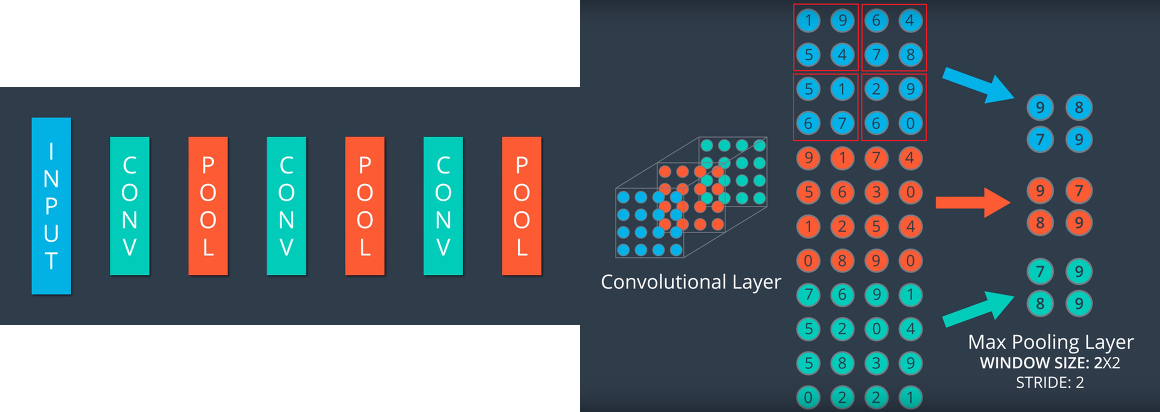

객체인식계열 딥러닝 모델은 CONV, AF, POOL이 두개가 됫건 3개가 다 붙건 아무튼 묶어서 한 세트로 모듈을 만들어 쓰는게 일반적임
여기서 Pooling Layer는 Conv를 통과하고 나온 Feature Map을 그냥 다음 Conv에 계속 연결하면 할수록 차원이 계속 높아지는 문제가 있음 -> 차원이 높아지면 파라미터가 많아지고 -> 이것은 over-fitting 문제를 일으킴
-> 이걸 없애려고 중간마다 차원을 찌그러트리는 Pooling Layer를 넣는거임

#### Over-fitting

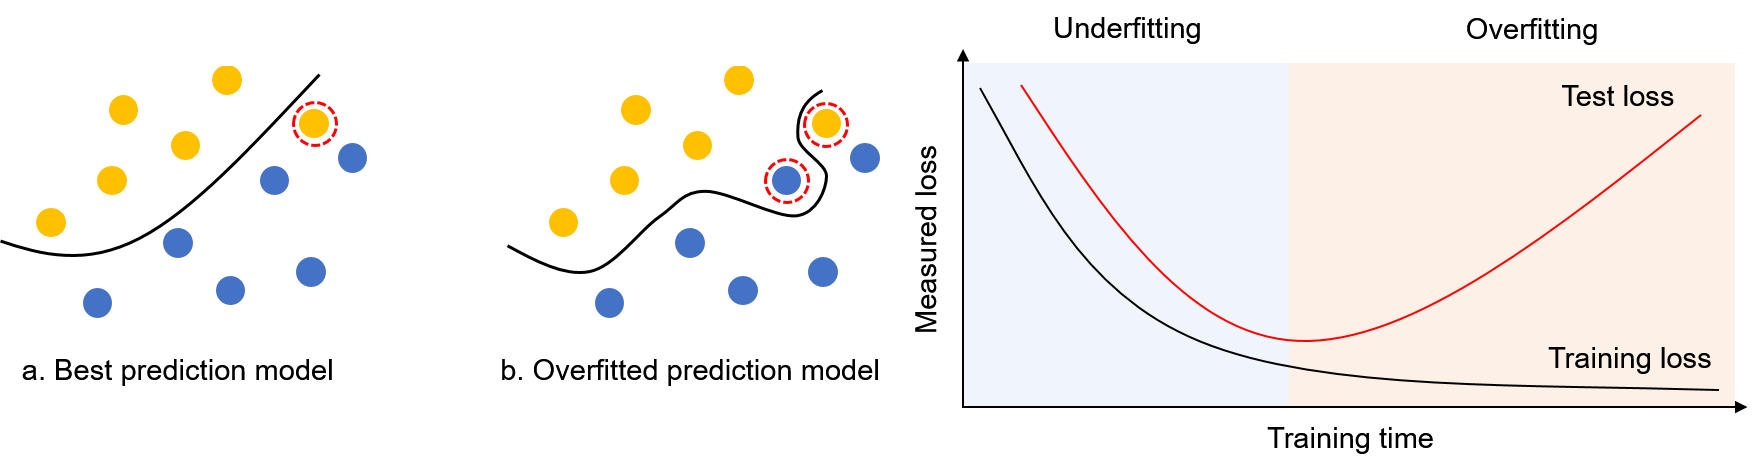

너무 학습시켜도 문제가 있다는 뜻임..

Overlapping Pooling는 이 Pooling Layer를 사용하는 방법에서 커널을 겹치지 않게 넘어가는건데 겹쳐서 넘어가게 만들었다는 거임 -> 장점 : 오버피팅이 덜남


## 4. Reducing Overfitting

오버피팅이 안나게 하기 위한 방법으로 **Data Augmentation**, **Dropout**을 사용함

## 5. Details of learning

학습기 돌리는데 디테일한 하이퍼 파라미터 세팅사항들
- **Optimizer:** Stochastic Gradient Descent
- **Batch size:** 128
- **Momentum:** 0.9
- **Weight decay:** 0.0005
- **Weight initialization:** Gaussian distribution of μ=0, σ=0.01
- **Bias initialization:** 
  - 2nd, 4th, 5th conv layers, fc layers -> 1
  - 1st, 3rd conv layers -> 0
- **Initial learning rate:** 0.01
- **Epochs:** roughly 90

## 활성화함수 : ReLU

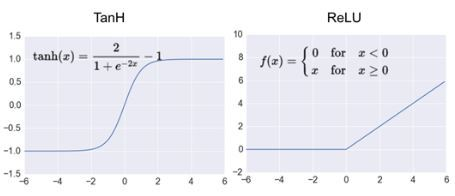

## Drop-out

과적합(Over-fitting)을 막기 위한 장치
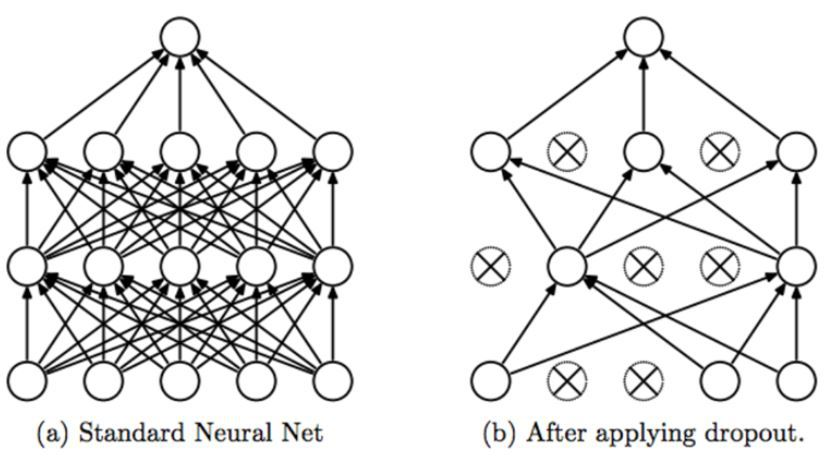

모든 뉴런을 사용하지 않고 일부 뉴런을 건너뛰는것

## Overlapping pooling
CNN에서 Pooling은 특성맥의 크기를 줄이는 방식이며, AlexNet는 Max Pooling을 적용함
또 커널이 움직이는 보폭인 Stride를 커널 사이즈보다 작게 하는 Operlapping polling을 적용
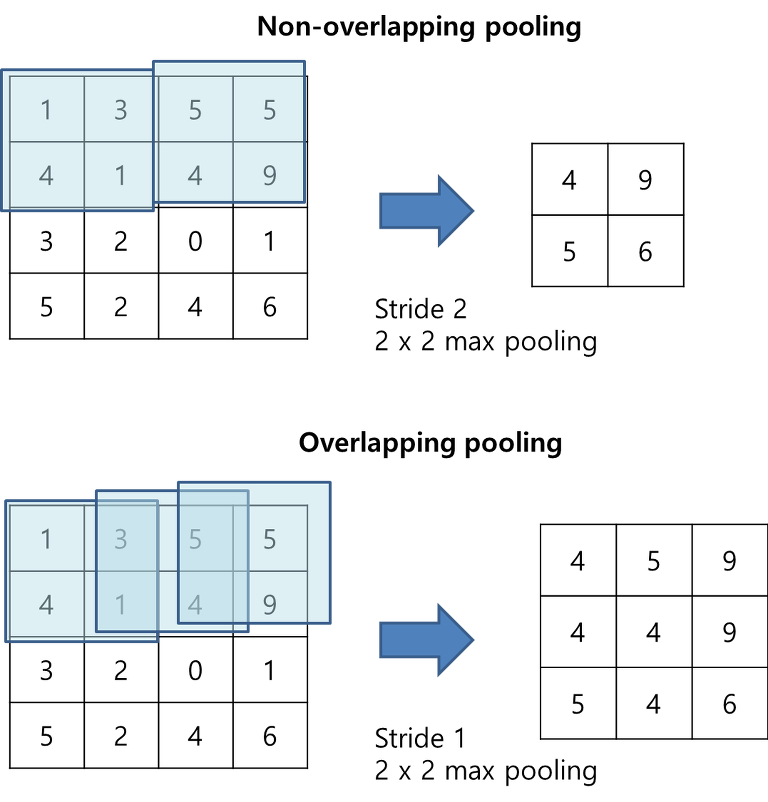

## Data Augementation
데이터양을 늘리는 방식인데 같은 이미지를 90도 회전, 늘이고 줄이는 식으로 살짝만 변형해서 변형된 이미지를 여러장 찍어내는거..

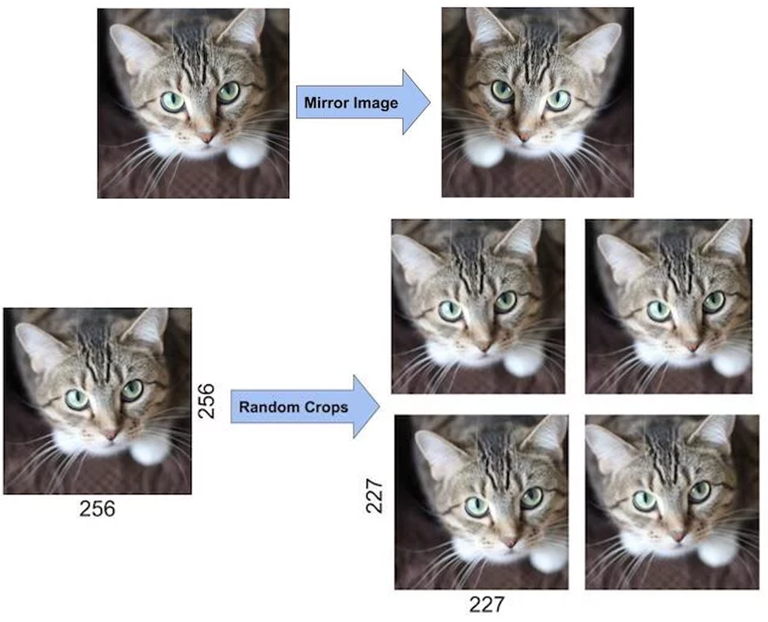

# AlexNet 파이토치로 구현하기

구현 방법은 데이터셋 받아오기 -> 데이터 전처리 -> CNN모델 설계 -> 훈련 -> 평가 순으로 진행함

In [3]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F #이거는 활성화 함수 모듈
import torch.optim as optim

import torchvision #예제 이미지 데이터셋이 모여있는 모듈
from torchvision import datasets, transforms

from tqdm import tqdm #훈련 진행상황 체크

1. 데이터셋 받아오기

참조한 블로그는 https://teddylee777.github.io/pytorch/alexnet-implementation/
이고 여기서 데이터셋으로는 개/고양이 를 썻지만

https://www.cs.toronto.edu/~kriz/cifar.html에 나와있는
CIFAR-10 데이터셋을 사용하기로 해봄

![스크린샷 2024-05-08 040446.png](<attachment:스크린샷 2024-05-08 040446.png>)
60000 32x32 colour images in 10 classes 으로 구성되어 있음

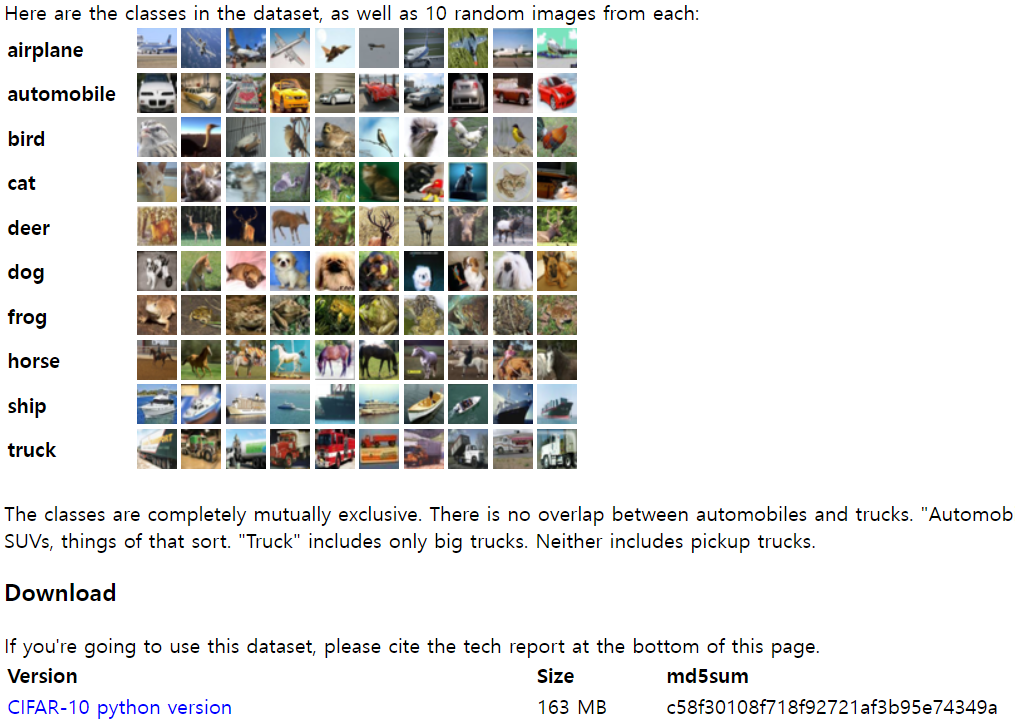

In [9]:
#훈련용 데이터와 평가용 데이터를 분절한다.

train_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10("data", train=True, download=True, transform=transforms.Compose([
        transforms.Resize((227, 227)), #AlexNet의 입력 픽셀 사이즈에 맞게 이미지 크기조정
        transforms.RandomHorizontalFlip(0.5), #50퍼센트 확률로 좌우 반전
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)) 
        # 이미지 정규화 -> 이거는 평균, 분산인데 뭐 넘어가자...
    ])),
    batch_size=96, shuffle=True #batch_size는 병렬처리 하려는 이미지 개수를 의미
)

test_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10("data", train=False, download=True, transform=transforms.Compose([
        transforms.Resize((227, 227)), #AlexNet의 입력 픽셀 사이즈에 맞게 이미지 크기조정
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)) 
        # 이미지 정규화 -> 이거는 평균, 분산인데 뭐 넘어가자...
    ])),
    batch_size=96, shuffle=False
)

#위 설정한 변수의 속성정보 출력하기
def count_images_and_labels(loader):
    num_images = len(loader.dataset)  # 데이터셋의 전체 이미지 개수
    label_set = set() #라벨 데이터를 Unique한 종류로만 만듬 -> 중복을 삭제함
    for _, labels in loader:
        label_set.update(labels.tolist())
    
    return num_images, len(label_set)

train_images, train_label_count = count_images_and_labels(train_loader)
test_images, test_label_count = count_images_and_labels(test_loader)

print(f"Training Images: {train_images}, Unique Labels: {train_label_count}")
print(f"Testing Images: {test_images}, Unique Labels: {test_label_count}")

#train (bool, optional) – If True, creates dataset from training set, otherwise creates from test set.
#위 항목의 경우 훈련용 이미지 총 개수, 테스트용 이미지 총 개수는 정의가 되어 있는 듯 하다.

Files already downloaded and verified
Files already downloaded and verified
Training Images: 50000, Unique Labels: 10
Testing Images: 10000, Unique Labels: 10


In [10]:
#ToTensor 로 형변환한 이미지의 속성정보 확인하기
images, labels = next(iter(train_loader))
print(images[0].shape)

torch.Size([3, 227, 227])


In [17]:
#훈련 시작에 앞서 pytorch를 GPU로 구동하게끔 사전설정하기

#GPU사용 가능 확인하기
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# CUDA가 사용 가능한 경우, 추가 정보 출력
if device.type == 'cuda':
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
    print(f"GPU Capability: {torch.cuda.get_device_capability(0)}")
    print(f"Total Memory: {torch.cuda.get_device_properties(0).total_memory / (1024 ** 3):.2f} GB")  # GB 단위로 변환
    print(f"Number of GPUs: {torch.cuda.device_count()}")


cuda
GPU Name: NVIDIA GeForce RTX 4090 Laptop GPU
GPU Capability: (8, 9)
Total Memory: 15.99 GB
Number of GPUs: 1


## AlexNet 네트워크 설계
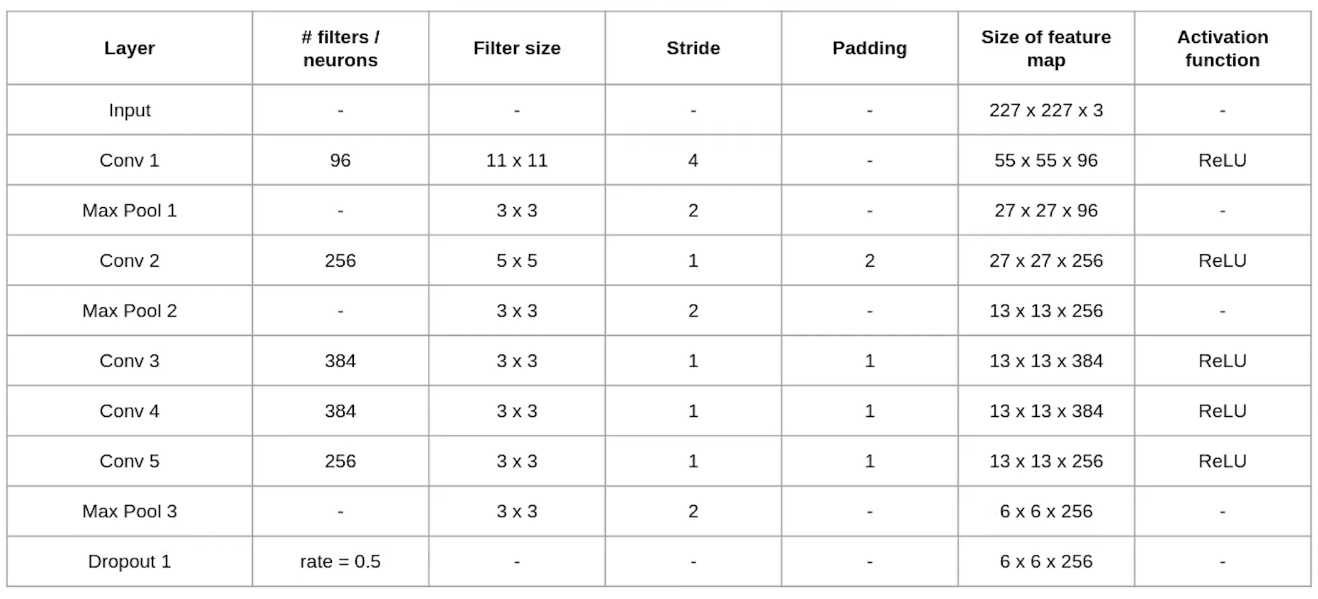

위 표의 아키텍쳐 대로 설계하면 된다.

In [21]:
#AlexNet 모델 설계하기

class AlexNet_model(nn.Module):
    def __init__(self):
        super(AlexNet_model, self).__init__()

        self.cnn_layers = nn.Sequential(
            #1층 : 입력 3채널 -> 출력 96채널 
            #커널 : 11x11x3, strid=4, zero-padding안씀
            #Relu사용, Maxpooling사용(strid2, 3x3커널사이즈)
            nn.Conv2d(in_channels=3, out_channels=96, kernel_size=(11, 11), stride=4, padding=0), 
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size=3, stride=2),

            #2층 : 입력 96채널 -> 출력 128채널 * 2
            #커널 : 5x5x48, strid=1, zero-padding 2적용
            #Relu사용, Maxpooling사용(strid2, 3x3커널사이즈)
            nn.Conv2d(in_channels=96, out_channels=256, kernel_size=(5, 5), stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), 

            #3층 : 입력 256채널 -> 출력 384채널
            #커널 : 3X3X256, strid=1, zero-padding 1적용
            #Relu사용
            nn.Conv2d(in_channels=256, out_channels=384, kernel_size=(3, 3), stride=1, padding=1),
            nn.ReLU(),

            #4층 : 입력 384채널 -> 출력 384채널
            #커널 : 3X3X384, strid=1, zero-padding 1적용
            #Relu사용
            nn.Conv2d(in_channels=384, out_channels=384, kernel_size=(3, 3), stride=1, padding=1),
            nn.ReLU(),

            #5층 : 입력 384채널 -> 출력 256채널
            #커널 : 3X3X384, strid=1, zero-padding 1적용
            #Relu사용, Maxpooling사용(strid2, 3x3커널사이즈)
            nn.Conv2d(in_channels=384, out_channels=256, kernel_size=(3, 3), stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )

        self.fcn_layers = nn.Sequential(
            #6층 : Droupout 적용, 6x6x256특성맵 입력, 4096출력
            #RelU적용
            nn.Dropout(p=0.5),
            nn.Linear(in_features=256*6*6, out_features=4096),
            nn.ReLU(),

            #7층 : Droupout 적용, 4096입력, 4096출력
            #RelU적용
            nn.Dropout(p=0.5),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(),

            #8층 : 입력 4096 -> 출력 1000(여기서 클래스가 10개인데 어케되려나...)
            #최종 판별할 클래스가 10개이니 10으로 쓴다.
            nn.Linear(in_features=4096, out_features=10),
        )

    def forward(self, x):
        x = self.cnn_layers(x)
        #5층에서 6층 넘어갈 때 flatten과정을 수행해야함
        x = x.view(-1, 256*6*6)

        x = self.fcn_layers(x)
        return x

In [24]:
#모델 인스턴스화 및 GPU할당, 모델 정보 출력
import torchsummary

ex_model = AlexNet_model()
ex_model.to(device)

#설계한 모델이 정상동작하는지 확인하는 코드
torchsummary.summary(ex_model, input_size=(3,227,227), device='cuda')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 55, 55]          34,944
              ReLU-2           [-1, 96, 55, 55]               0
         MaxPool2d-3           [-1, 96, 27, 27]               0
            Conv2d-4          [-1, 256, 27, 27]         614,656
              ReLU-5          [-1, 256, 27, 27]               0
         MaxPool2d-6          [-1, 256, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         885,120
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 384, 13, 13]       1,327,488
             ReLU-10          [-1, 384, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         884,992
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
          Dropout-14                 [-

In [25]:
#옵티마이저 및 로스 함수 정의
optimizer = optim.Adam(ex_model.parameters(), lr=0.001)
#LR값은 0.001로 좀 더 큰 스텝으로 움직이게 한다

criterion = nn.CrossEntropyLoss() #로스함수는 CEL 사용

## 토막상식 : 최적화 알고리즘과 학습률(Learning Rate)

학습률 : 경사하강법으로 Global Minimum을 찾는 반복작업을 할 때, 이 시작점 -> 다음점에서 이동할 보폭(step size)
</br>이 보폭을 잘 설계하면 loss(손실)그래프가 일반적인 수렴그래프로 나옴



## 모델의 훈련 시작~!

이때 중요한 코드 : ```model.train()```
이 코드는 해당 모델을 '**훈련**'모드로 설정함을 알리는 것이며, 해당 모드일 시 모델의 파라미터가 업데이트 되고 이에 따른 Gradient 계산을 가능하게 해준다
그 외 수행하는 기능은 아래와 같다.
- 드롭아웃(dropout) 및 배치 정규화(batch normalization)와 같은 정규화(reularization)기법이 동작함
- Gradient 계산이 가능해짐 -> 이에 따른 역전파(backprogation)수행이 가능해짐
- 모델 파라미터 업데이트가 가능해짐 -> 이 파라미터 업데이트에 optimizer 함수가 관여함

In [31]:
def model_train(model, data_loader, loss_fn, optimizer_fn, processing_device):

    model.train() #모델을 훈련 모드로 설정

    #loss와 accuracy를 계산하기 위한 임시 변수를 생성
    run_size, run_loss, corr = 0, 0, 0

    #훈련 상태 모니터링
    progress_bar = tqdm(data_loader) #이때 사용되는 데이터는 훈련용 데이터

    
    for batch_idx, (image, label) in enumerate(progress_bar, start=1):
        #입력된 데이터를 먼저 GPU로 이전하기
        image = image.to(processing_device)
        label = label.to(processing_device)

        #전사과정 수행
        outputs = model(image)
        loss = loss_fn(outputs, label)

        #옵티마이저의 Gradient 초기화
        optimizer_fn.zero_grad()

        #backward 과정 수행
        loss.backward() #Backprogration을 진행하여 Gradient계산
        optimizer_fn.step() #계산된 gradient(모델 파라미터)를 업데이트


        #여기부터는 학습이 잘 되고 있는지 확인하는 부분
        _, pred = outputs.max(dim=1)
        corr += pred.eq(label).sum().item()
        
        run_loss += loss.item() * image.size(0)
        run_size += image.size(0)
        progress_bar.set_description('[Training] loss: ' + \
                            f'{run_loss / run_size:.4f}, accuracy: ' + \
                            f'{corr / run_size:.4f}')
        
    acc = corr / len(data_loader.dataset)

    return run_loss / len(data_loader.dataset), acc

코드 설명
corr : correct를 줄인 말을 변수로 지정한 것으로 : 현재까지 올바르게 예측된 샘플의 수를 저장

_, pred = outputs.max(dim=1) -> 모델의 예측 결과에서 가장 높은 점수를 갖는 클래스의 인덱스를 찾아서 pred에 저장

corr += pred.eq(label).sum().item()
여기서 eq()메서드는 equal의 줄임말
사용법 :
```python
pred = torch.tensor([0, 2, 1, 3])
label = torch.tensor([0, 1, 1, 3])
correct_predictions = pred.eq(label)
print(correct_predictions)
tensor([ True, False,  True,  True])
```

이렇게 eq()메서드로 T/F를 확인한 뒤 .sum()함수로 T에 해당하는 값 (1)을 .item()으로 스칼라 값으로 변환시킴
그 다음에 corr에 더해서 correct의 개수를 새는것

.item()
모든 중간과정의 데이터는 텐서 자료형이기에 이걸 스칼라 자료형으로 바꿔줘야함. 이때 .item()을 씀
그냥 .toint()랑 같은 기능을 한다 보면됨
```python
tensor_int = torch.tensor(42)  # 정수 텐서
tensor_float = torch.tensor(42.0)  # 실수 텐서

scalar_int = tensor_int.item()
scalar_float = tensor_float.item()

print(scalar_int)  # 출력: 42
print(type(scalar_int))  # 출력: <class 'int'>

print(scalar_float)  # 출력: 42.0
print(type(scalar_float))  # 출력: <class 'float'>
```


run_loss += loss.item() * image.size(0)
이 구문은 한 epoch를 수행 할때마다 평균 loss를 구하기 위한 구문임
image.size(0)을 곱하는 이유는 batch_size를 알아야 해서 곱하는거임
-> 예를 들어 batch_size가 64이면 corrcet를 구하는 과정이 한 epoch당 64번을 수행함
-> 따라서 loss.item()은 평균손실 값을 반환하기에 batch_size를 안곱하면 1/64로 작아진 평균손실이 나오는거임

## 모델을 평가하는 구문 작성
여기서도 중요한 코드 : ```model.eval()``` 이 구문은 모델을 '평가'모드로 설정함을 알리는 메서드
평가 모드가 되면 droupout 비 활성화, 배치 정규화에서 평균/분산이 업데이트 되지 않음
```torch.no_grad()``` 이 구문은 gradient 트래킹을 더이상 하지 않게 해줌

In [33]:
def model_evaluate(model, data_loader, loss_fn, processing_device):
    model.eval() #모델을 평가 모드로 전환

    #gradient업데이틀를 방지해주자
    with torch.no_grad():

        #여기서도 loss, accuracy 계산을 위한 임시 변수 선언
        run_loss, corr = 0, 0


        for image, label in data_loader: #이때 사용되는 데이터는 평가용 데이터
            #입력된 데이터를 먼저 GPU로 이전하기
            image = image.to(processing_device)
            label = label.to(processing_device)


            #평가 결과를 도출하자
            outputs = model(image)

            _, pred = outputs.max(dim=1)

            
            #모델의 평가 결과 도출 부분
            # 배치의 실제 크기에 맞추어 정확도와 손실을 계산
            corr += torch.sum(pred.eq(label)).item()
            run_loss += loss_fn(outputs, label).item() * image.size(0)

        # 전체 데이터셋에 대한 평균 손실과 정확도 계산
        acc = corr / len(data_loader.dataset)

        return run_loss / len(data_loader.dataset), acc


## 훈련과 검증을 실행하는 코드

In [34]:
min_loss = np.inf
MODEL_NAME = 'AlexNet'

# Epoch 별 훈련 및 검증을 수행합니다.
for epoch in range(100):
    # Model Training
    # 훈련 손실과 정확도를 반환 받습니다.
    train_loss, train_acc = model_train(ex_model, train_loader, criterion, optimizer, device)

    # 검증 손실과 검증 정확도를 반환 받습니다.
    val_loss, val_acc = model_evaluate(ex_model, test_loader, criterion, device)   
    
    # val_loss 가 개선되었다면 min_loss를 갱신하고 model의 가중치(weights)를 저장합니다.
    if val_loss < min_loss:
        print(f'[INFO] val_loss has been improved from {min_loss:.5f} to {val_loss:.5f}. Saving Model!')
        min_loss = val_loss
        torch.save(ex_model.state_dict(), f'{MODEL_NAME}.pth')
    
    # Epoch 별 결과를 출력합니다.
    print(f'epoch {epoch+1:02d}, loss: {train_loss:.5f}, acc: {train_acc:.5f}, val_loss: {val_loss:.5f}, val_accuracy: {val_acc:.5f}')

[Training] loss: 1.3995, accuracy: 0.4886: 100%|██████████| 521/521 [01:02<00:00,  8.39it/s]


[INFO] val_loss has been improved from inf to 1.27247. Saving Model!
epoch 01, loss: 1.39951, acc: 0.48862, val_loss: 1.27247, val_accuracy: 0.54830


[Training] loss: 1.2585, accuracy: 0.5510: 100%|██████████| 521/521 [01:04<00:00,  8.06it/s]


[INFO] val_loss has been improved from 1.27247 to 1.12050. Saving Model!
epoch 02, loss: 1.25851, acc: 0.55104, val_loss: 1.12050, val_accuracy: 0.60980


[Training] loss: 1.1710, accuracy: 0.5858: 100%|██████████| 521/521 [01:04<00:00,  8.10it/s]


[INFO] val_loss has been improved from 1.12050 to 1.03882. Saving Model!
epoch 03, loss: 1.17103, acc: 0.58576, val_loss: 1.03882, val_accuracy: 0.63620


[Training] loss: 1.0883, accuracy: 0.6158: 100%|██████████| 521/521 [01:04<00:00,  8.07it/s]


[INFO] val_loss has been improved from 1.03882 to 1.00930. Saving Model!
epoch 04, loss: 1.08834, acc: 0.61584, val_loss: 1.00930, val_accuracy: 0.64530


[Training] loss: 1.0269, accuracy: 0.6411: 100%|██████████| 521/521 [01:04<00:00,  8.04it/s]


[INFO] val_loss has been improved from 1.00930 to 0.96031. Saving Model!
epoch 05, loss: 1.02686, acc: 0.64114, val_loss: 0.96031, val_accuracy: 0.66400


[Training] loss: 0.9872, accuracy: 0.6552: 100%|██████████| 521/521 [01:04<00:00,  8.02it/s]


[INFO] val_loss has been improved from 0.96031 to 0.94695. Saving Model!
epoch 06, loss: 0.98715, acc: 0.65524, val_loss: 0.94695, val_accuracy: 0.67220


[Training] loss: 0.9620, accuracy: 0.6629: 100%|██████████| 521/521 [01:04<00:00,  8.03it/s]


[INFO] val_loss has been improved from 0.94695 to 0.89966. Saving Model!
epoch 07, loss: 0.96200, acc: 0.66294, val_loss: 0.89966, val_accuracy: 0.68780


[Training] loss: 0.9230, accuracy: 0.6771: 100%|██████████| 521/521 [01:04<00:00,  8.02it/s]


[INFO] val_loss has been improved from 0.89966 to 0.87877. Saving Model!
epoch 08, loss: 0.92295, acc: 0.67712, val_loss: 0.87877, val_accuracy: 0.69760


[Training] loss: 0.9022, accuracy: 0.6847: 100%|██████████| 521/521 [01:04<00:00,  8.03it/s]


[INFO] val_loss has been improved from 0.87877 to 0.87149. Saving Model!
epoch 09, loss: 0.90223, acc: 0.68472, val_loss: 0.87149, val_accuracy: 0.69610


[Training] loss: 0.8735, accuracy: 0.6942: 100%|██████████| 521/521 [01:04<00:00,  8.03it/s]


[INFO] val_loss has been improved from 0.87149 to 0.84173. Saving Model!
epoch 10, loss: 0.87350, acc: 0.69420, val_loss: 0.84173, val_accuracy: 0.71150


[Training] loss: 0.8598, accuracy: 0.6994: 100%|██████████| 521/521 [01:06<00:00,  7.86it/s]


[INFO] val_loss has been improved from 0.84173 to 0.82438. Saving Model!
epoch 11, loss: 0.85977, acc: 0.69938, val_loss: 0.82438, val_accuracy: 0.71580


[Training] loss: 0.8310, accuracy: 0.7094: 100%|██████████| 521/521 [01:07<00:00,  7.71it/s]


epoch 12, loss: 0.83105, acc: 0.70940, val_loss: 0.83554, val_accuracy: 0.71810


[Training] loss: 0.8173, accuracy: 0.7156: 100%|██████████| 521/521 [01:07<00:00,  7.68it/s]


[INFO] val_loss has been improved from 0.82438 to 0.80105. Saving Model!
epoch 13, loss: 0.81728, acc: 0.71560, val_loss: 0.80105, val_accuracy: 0.72470


[Training] loss: 0.8162, accuracy: 0.7167: 100%|██████████| 521/521 [01:07<00:00,  7.70it/s]


epoch 14, loss: 0.81623, acc: 0.71668, val_loss: 0.85156, val_accuracy: 0.70580


[Training] loss: 0.7915, accuracy: 0.7248: 100%|██████████| 521/521 [01:07<00:00,  7.72it/s]


epoch 15, loss: 0.79154, acc: 0.72482, val_loss: 0.80620, val_accuracy: 0.72570


[Training] loss: 0.7848, accuracy: 0.7267: 100%|██████████| 521/521 [01:07<00:00,  7.69it/s]


epoch 16, loss: 0.78484, acc: 0.72672, val_loss: 0.80991, val_accuracy: 0.72670


[Training] loss: 0.7738, accuracy: 0.7300: 100%|██████████| 521/521 [01:07<00:00,  7.69it/s]


[INFO] val_loss has been improved from 0.80105 to 0.78850. Saving Model!
epoch 17, loss: 0.77375, acc: 0.73004, val_loss: 0.78850, val_accuracy: 0.73250


[Training] loss: 0.7611, accuracy: 0.7348: 100%|██████████| 521/521 [01:15<00:00,  6.89it/s]


epoch 18, loss: 0.76106, acc: 0.73476, val_loss: 0.80090, val_accuracy: 0.72780


[Training] loss: 0.7435, accuracy: 0.7414: 100%|██████████| 521/521 [01:22<00:00,  6.33it/s]


epoch 19, loss: 0.74354, acc: 0.74144, val_loss: 0.83630, val_accuracy: 0.71800


[Training] loss: 0.7377, accuracy: 0.7440: 100%|██████████| 521/521 [01:25<00:00,  6.10it/s]


[INFO] val_loss has been improved from 0.78850 to 0.77385. Saving Model!
epoch 20, loss: 0.73772, acc: 0.74398, val_loss: 0.77385, val_accuracy: 0.73660


[Training] loss: 0.7190, accuracy: 0.7491: 100%|██████████| 521/521 [01:16<00:00,  6.85it/s]


epoch 21, loss: 0.71900, acc: 0.74910, val_loss: 0.80011, val_accuracy: 0.72760


[Training] loss: 0.7182, accuracy: 0.7529: 100%|██████████| 521/521 [01:17<00:00,  6.75it/s]


epoch 22, loss: 0.71821, acc: 0.75294, val_loss: 0.78190, val_accuracy: 0.73290


[Training] loss: 0.7038, accuracy: 0.7578: 100%|██████████| 521/521 [01:14<00:00,  6.98it/s]


[INFO] val_loss has been improved from 0.77385 to 0.77113. Saving Model!
epoch 23, loss: 0.70382, acc: 0.75784, val_loss: 0.77113, val_accuracy: 0.73850


[Training] loss: 0.6691, accuracy: 0.7673: 100%|██████████| 521/521 [01:14<00:00,  6.97it/s]


[INFO] val_loss has been improved from 0.77113 to 0.77108. Saving Model!
epoch 24, loss: 0.66906, acc: 0.76732, val_loss: 0.77108, val_accuracy: 0.74430


[Training] loss: 0.6867, accuracy: 0.7620: 100%|██████████| 521/521 [01:17<00:00,  6.73it/s]


[INFO] val_loss has been improved from 0.77108 to 0.72094. Saving Model!
epoch 25, loss: 0.68669, acc: 0.76204, val_loss: 0.72094, val_accuracy: 0.75330


[Training] loss: 0.6727, accuracy: 0.7684: 100%|██████████| 521/521 [01:21<00:00,  6.41it/s]


epoch 26, loss: 0.67272, acc: 0.76840, val_loss: 0.77774, val_accuracy: 0.73690


[Training] loss: 0.6528, accuracy: 0.7717: 100%|██████████| 521/521 [01:27<00:00,  5.93it/s]


epoch 27, loss: 0.65280, acc: 0.77168, val_loss: 0.76552, val_accuracy: 0.73860


[Training] loss: 0.6425, accuracy: 0.7776: 100%|██████████| 521/521 [01:16<00:00,  6.78it/s]


[INFO] val_loss has been improved from 0.72094 to 0.71997. Saving Model!
epoch 28, loss: 0.64247, acc: 0.77760, val_loss: 0.71997, val_accuracy: 0.75940


[Training] loss: 0.6307, accuracy: 0.7824: 100%|██████████| 521/521 [01:15<00:00,  6.92it/s]


[INFO] val_loss has been improved from 0.71997 to 0.71994. Saving Model!
epoch 29, loss: 0.63066, acc: 0.78240, val_loss: 0.71994, val_accuracy: 0.75910


[Training] loss: 0.6117, accuracy: 0.7885: 100%|██████████| 521/521 [01:16<00:00,  6.85it/s]


epoch 30, loss: 0.61170, acc: 0.78852, val_loss: 0.76124, val_accuracy: 0.74110


[Training] loss: 0.6146, accuracy: 0.7870: 100%|██████████| 521/521 [01:18<00:00,  6.61it/s]


epoch 31, loss: 0.61459, acc: 0.78700, val_loss: 0.74204, val_accuracy: 0.74780


[Training] loss: 0.6079, accuracy: 0.7903: 100%|██████████| 521/521 [01:14<00:00,  6.96it/s]


epoch 32, loss: 0.60794, acc: 0.79028, val_loss: 0.73910, val_accuracy: 0.74910


[Training] loss: 0.5912, accuracy: 0.7964: 100%|██████████| 521/521 [01:14<00:00,  7.03it/s]


epoch 33, loss: 0.59115, acc: 0.79644, val_loss: 0.73847, val_accuracy: 0.75570


[Training] loss: 0.5829, accuracy: 0.7997: 100%|██████████| 521/521 [01:13<00:00,  7.07it/s]


[INFO] val_loss has been improved from 0.71994 to 0.71688. Saving Model!
epoch 34, loss: 0.58289, acc: 0.79966, val_loss: 0.71688, val_accuracy: 0.75550


[Training] loss: 0.5694, accuracy: 0.8064: 100%|██████████| 521/521 [01:13<00:00,  7.04it/s]


[INFO] val_loss has been improved from 0.71688 to 0.70693. Saving Model!
epoch 35, loss: 0.56944, acc: 0.80642, val_loss: 0.70693, val_accuracy: 0.76590


[Training] loss: 0.5684, accuracy: 0.8041: 100%|██████████| 521/521 [01:17<00:00,  6.70it/s]


epoch 36, loss: 0.56840, acc: 0.80414, val_loss: 0.75924, val_accuracy: 0.74430


[Training] loss: 0.5618, accuracy: 0.8064: 100%|██████████| 521/521 [01:19<00:00,  6.58it/s]


epoch 37, loss: 0.56182, acc: 0.80640, val_loss: 0.72104, val_accuracy: 0.75990


[Training] loss: 0.5537, accuracy: 0.8135: 100%|██████████| 521/521 [01:17<00:00,  6.69it/s]


[INFO] val_loss has been improved from 0.70693 to 0.70486. Saving Model!
epoch 38, loss: 0.55368, acc: 0.81348, val_loss: 0.70486, val_accuracy: 0.76810


[Training] loss: 0.5340, accuracy: 0.8179: 100%|██████████| 521/521 [01:15<00:00,  6.88it/s]


epoch 39, loss: 0.53396, acc: 0.81790, val_loss: 0.73234, val_accuracy: 0.76230


[Training] loss: 0.5216, accuracy: 0.8218: 100%|██████████| 521/521 [01:13<00:00,  7.08it/s]


[INFO] val_loss has been improved from 0.70486 to 0.68783. Saving Model!
epoch 40, loss: 0.52161, acc: 0.82178, val_loss: 0.68783, val_accuracy: 0.77050


[Training] loss: 0.5217, accuracy: 0.8221: 100%|██████████| 521/521 [01:13<00:00,  7.14it/s]


epoch 41, loss: 0.52169, acc: 0.82210, val_loss: 0.71364, val_accuracy: 0.76510


[Training] loss: 0.5259, accuracy: 0.8206: 100%|██████████| 521/521 [01:13<00:00,  7.12it/s]


epoch 42, loss: 0.52592, acc: 0.82060, val_loss: 0.71542, val_accuracy: 0.76240


[Training] loss: 0.5125, accuracy: 0.8243: 100%|██████████| 521/521 [01:13<00:00,  7.06it/s]


epoch 43, loss: 0.51251, acc: 0.82434, val_loss: 0.72544, val_accuracy: 0.76120


[Training] loss: 0.5008, accuracy: 0.8290: 100%|██████████| 521/521 [01:15<00:00,  6.86it/s]


epoch 44, loss: 0.50078, acc: 0.82900, val_loss: 0.75050, val_accuracy: 0.75290


[Training] loss: 0.4960, accuracy: 0.8327: 100%|██████████| 521/521 [01:18<00:00,  6.66it/s]


epoch 45, loss: 0.49605, acc: 0.83266, val_loss: 0.70978, val_accuracy: 0.77120


[Training] loss: 0.5651, accuracy: 0.8108: 100%|██████████| 521/521 [01:18<00:00,  6.64it/s]


epoch 46, loss: 0.56514, acc: 0.81080, val_loss: 0.71944, val_accuracy: 0.76550


[Training] loss: 0.4871, accuracy: 0.8339: 100%|██████████| 521/521 [01:18<00:00,  6.66it/s]


epoch 47, loss: 0.48713, acc: 0.83386, val_loss: 0.75518, val_accuracy: 0.76100


[Training] loss: 0.4702, accuracy: 0.8423: 100%|██████████| 521/521 [01:14<00:00,  7.02it/s]


epoch 48, loss: 0.47020, acc: 0.84226, val_loss: 0.70944, val_accuracy: 0.76760


[Training] loss: 0.4578, accuracy: 0.8440: 100%|██████████| 521/521 [01:13<00:00,  7.07it/s]


epoch 49, loss: 0.45780, acc: 0.84400, val_loss: 0.72715, val_accuracy: 0.76580


[Training] loss: 0.4691, accuracy: 0.8432: 100%|██████████| 521/521 [01:14<00:00,  6.96it/s]


epoch 50, loss: 0.46911, acc: 0.84320, val_loss: 0.73426, val_accuracy: 0.75830


[Training] loss: 0.4607, accuracy: 0.8423: 100%|██████████| 521/521 [01:13<00:00,  7.04it/s]


epoch 51, loss: 0.46073, acc: 0.84226, val_loss: 0.74094, val_accuracy: 0.77130


[Training] loss: 0.4492, accuracy: 0.8491: 100%|██████████| 521/521 [01:13<00:00,  7.11it/s]


epoch 52, loss: 0.44924, acc: 0.84910, val_loss: 0.71912, val_accuracy: 0.77240


[Training] loss: 0.4347, accuracy: 0.8549: 100%|██████████| 521/521 [01:13<00:00,  7.13it/s]


epoch 53, loss: 0.43474, acc: 0.85488, val_loss: 0.74696, val_accuracy: 0.77180


[Training] loss: 0.4413, accuracy: 0.8519: 100%|██████████| 521/521 [01:13<00:00,  7.12it/s]


epoch 54, loss: 0.44128, acc: 0.85190, val_loss: 0.73766, val_accuracy: 0.77020


[Training] loss: 0.4317, accuracy: 0.8544: 100%|██████████| 521/521 [01:13<00:00,  7.06it/s]


epoch 55, loss: 0.43171, acc: 0.85444, val_loss: 0.74358, val_accuracy: 0.77360


[Training] loss: 0.4391, accuracy: 0.8539: 100%|██████████| 521/521 [01:18<00:00,  6.64it/s]


epoch 56, loss: 0.43915, acc: 0.85394, val_loss: 0.75486, val_accuracy: 0.76410


[Training] loss: 0.4246, accuracy: 0.8590: 100%|██████████| 521/521 [01:18<00:00,  6.65it/s]


epoch 57, loss: 0.42461, acc: 0.85900, val_loss: 0.72528, val_accuracy: 0.76240


[Training] loss: 0.4287, accuracy: 0.8563: 100%|██████████| 521/521 [01:14<00:00,  7.04it/s]


epoch 58, loss: 0.42872, acc: 0.85632, val_loss: 0.73788, val_accuracy: 0.76680


[Training] loss: 0.4150, accuracy: 0.8613: 100%|██████████| 521/521 [01:13<00:00,  7.11it/s]


epoch 59, loss: 0.41503, acc: 0.86128, val_loss: 0.75146, val_accuracy: 0.77110


[Training] loss: 0.4040, accuracy: 0.8663: 100%|██████████| 521/521 [01:12<00:00,  7.16it/s]


epoch 60, loss: 0.40401, acc: 0.86628, val_loss: 0.72580, val_accuracy: 0.78020


[Training] loss: 0.3991, accuracy: 0.8674: 100%|██████████| 521/521 [01:13<00:00,  7.14it/s]


epoch 61, loss: 0.39910, acc: 0.86738, val_loss: 0.77265, val_accuracy: 0.76830


[Training] loss: 0.3966, accuracy: 0.8693: 100%|██████████| 521/521 [01:13<00:00,  7.05it/s]


epoch 62, loss: 0.39664, acc: 0.86934, val_loss: 0.77000, val_accuracy: 0.76530


[Training] loss: 0.3887, accuracy: 0.8737: 100%|██████████| 521/521 [01:14<00:00,  7.02it/s]


epoch 63, loss: 0.38873, acc: 0.87374, val_loss: 0.71805, val_accuracy: 0.77620


[Training] loss: 0.3947, accuracy: 0.8695: 100%|██████████| 521/521 [01:15<00:00,  6.86it/s]


epoch 64, loss: 0.39474, acc: 0.86952, val_loss: 0.70882, val_accuracy: 0.78280


[Training] loss: 0.3931, accuracy: 0.8708: 100%|██████████| 521/521 [01:18<00:00,  6.67it/s]


epoch 65, loss: 0.39311, acc: 0.87076, val_loss: 0.72335, val_accuracy: 0.77820


[Training] loss: 0.4011, accuracy: 0.8674: 100%|██████████| 521/521 [01:17<00:00,  6.69it/s]


epoch 66, loss: 0.40110, acc: 0.86744, val_loss: 0.80596, val_accuracy: 0.74250


[Training] loss: 0.4153, accuracy: 0.8662: 100%|██████████| 521/521 [01:17<00:00,  6.69it/s]


epoch 67, loss: 0.41530, acc: 0.86622, val_loss: 0.70998, val_accuracy: 0.77080


[Training] loss: 0.3601, accuracy: 0.8804: 100%|██████████| 521/521 [01:13<00:00,  7.08it/s]


epoch 68, loss: 0.36007, acc: 0.88042, val_loss: 0.70889, val_accuracy: 0.78290


[Training] loss: 0.3992, accuracy: 0.8715: 100%|██████████| 521/521 [01:13<00:00,  7.05it/s]


epoch 69, loss: 0.39922, acc: 0.87148, val_loss: 0.74029, val_accuracy: 0.77770


[Training] loss: 0.3762, accuracy: 0.8776: 100%|██████████| 521/521 [01:14<00:00,  7.00it/s]


epoch 70, loss: 0.37620, acc: 0.87764, val_loss: 0.73536, val_accuracy: 0.76770


[Training] loss: 0.3693, accuracy: 0.8797: 100%|██████████| 521/521 [01:14<00:00,  6.99it/s]


epoch 71, loss: 0.36932, acc: 0.87974, val_loss: 0.74432, val_accuracy: 0.77890


[Training] loss: 0.3694, accuracy: 0.8809: 100%|██████████| 521/521 [01:13<00:00,  7.05it/s]


epoch 72, loss: 0.36940, acc: 0.88086, val_loss: 0.74819, val_accuracy: 0.77070


[Training] loss: 0.3487, accuracy: 0.8868: 100%|██████████| 521/521 [01:13<00:00,  7.11it/s]


epoch 73, loss: 0.34873, acc: 0.88676, val_loss: 0.73472, val_accuracy: 0.77180


[Training] loss: 0.3551, accuracy: 0.8845: 100%|██████████| 521/521 [01:13<00:00,  7.06it/s]


epoch 74, loss: 0.35511, acc: 0.88450, val_loss: 0.77459, val_accuracy: 0.76830


[Training] loss: 0.3790, accuracy: 0.8779: 100%|██████████| 521/521 [01:16<00:00,  6.83it/s]


epoch 75, loss: 0.37898, acc: 0.87786, val_loss: 0.75603, val_accuracy: 0.77100


[Training] loss: 0.3519, accuracy: 0.8864: 100%|██████████| 521/521 [01:18<00:00,  6.67it/s]


epoch 76, loss: 0.35185, acc: 0.88638, val_loss: 0.73465, val_accuracy: 0.78360


[Training] loss: 0.3589, accuracy: 0.8870: 100%|██████████| 521/521 [01:16<00:00,  6.79it/s]


epoch 77, loss: 0.35885, acc: 0.88696, val_loss: 0.74880, val_accuracy: 0.77060


[Training] loss: 0.3304, accuracy: 0.8952: 100%|██████████| 521/521 [01:17<00:00,  6.71it/s]


epoch 78, loss: 0.33040, acc: 0.89516, val_loss: 0.75423, val_accuracy: 0.77620


[Training] loss: 0.4412, accuracy: 0.8754: 100%|██████████| 521/521 [01:18<00:00,  6.64it/s]


epoch 79, loss: 0.44116, acc: 0.87536, val_loss: 2.20096, val_accuracy: 0.17680


[Training] loss: 1.1330, accuracy: 0.6219: 100%|██████████| 521/521 [01:17<00:00,  6.71it/s]


epoch 80, loss: 1.13304, acc: 0.62186, val_loss: 0.81220, val_accuracy: 0.74650


[Training] loss: 0.4824, accuracy: 0.8467: 100%|██████████| 521/521 [01:17<00:00,  6.68it/s]


epoch 81, loss: 0.48236, acc: 0.84666, val_loss: 0.74956, val_accuracy: 0.77000


[Training] loss: 0.5350, accuracy: 0.8321: 100%|██████████| 521/521 [01:13<00:00,  7.04it/s]


epoch 82, loss: 0.53501, acc: 0.83208, val_loss: 0.74328, val_accuracy: 0.77100


[Training] loss: 0.4197, accuracy: 0.8668: 100%|██████████| 521/521 [01:13<00:00,  7.09it/s]


epoch 83, loss: 0.41969, acc: 0.86678, val_loss: 0.73842, val_accuracy: 0.77640


[Training] loss: 0.3616, accuracy: 0.8833: 100%|██████████| 521/521 [01:14<00:00,  6.95it/s]


epoch 84, loss: 0.36164, acc: 0.88328, val_loss: 0.73162, val_accuracy: 0.77990


[Training] loss: 0.3208, accuracy: 0.8971: 100%|██████████| 521/521 [01:15<00:00,  6.89it/s]


epoch 85, loss: 0.32078, acc: 0.89706, val_loss: 0.76581, val_accuracy: 0.78080


[Training] loss: 0.3623, accuracy: 0.8852: 100%|██████████| 521/521 [01:18<00:00,  6.62it/s]


epoch 86, loss: 0.36227, acc: 0.88522, val_loss: 0.75995, val_accuracy: 0.78160


[Training] loss: 0.3288, accuracy: 0.8963: 100%|██████████| 521/521 [01:19<00:00,  6.55it/s]


epoch 87, loss: 0.32883, acc: 0.89632, val_loss: 0.75918, val_accuracy: 0.76060


[Training] loss: 0.3308, accuracy: 0.8962: 100%|██████████| 521/521 [01:16<00:00,  6.80it/s]


epoch 88, loss: 0.33076, acc: 0.89618, val_loss: 0.78623, val_accuracy: 0.77480


[Training] loss: 0.3298, accuracy: 0.8958: 100%|██████████| 521/521 [01:15<00:00,  6.86it/s]


epoch 89, loss: 0.32983, acc: 0.89578, val_loss: 0.80553, val_accuracy: 0.77240


[Training] loss: 0.3341, accuracy: 0.8939: 100%|██████████| 521/521 [01:15<00:00,  6.87it/s]


epoch 90, loss: 0.33408, acc: 0.89392, val_loss: 0.74154, val_accuracy: 0.77610


[Training] loss: 0.3250, accuracy: 0.8979: 100%|██████████| 521/521 [01:16<00:00,  6.83it/s]


epoch 91, loss: 0.32502, acc: 0.89786, val_loss: 0.78869, val_accuracy: 0.78380


[Training] loss: 0.5005, accuracy: 0.8427: 100%|██████████| 521/521 [01:13<00:00,  7.04it/s]


epoch 92, loss: 0.50055, acc: 0.84272, val_loss: 0.77703, val_accuracy: 0.76660


[Training] loss: 0.3443, accuracy: 0.8917: 100%|██████████| 521/521 [01:14<00:00,  7.01it/s]


epoch 93, loss: 0.34433, acc: 0.89166, val_loss: 0.81439, val_accuracy: 0.76480


[Training] loss: 0.3503, accuracy: 0.8910: 100%|██████████| 521/521 [01:13<00:00,  7.05it/s]


epoch 94, loss: 0.35033, acc: 0.89102, val_loss: 0.77715, val_accuracy: 0.77130


[Training] loss: 0.3222, accuracy: 0.8993: 100%|██████████| 521/521 [01:14<00:00,  7.00it/s]


epoch 95, loss: 0.32221, acc: 0.89926, val_loss: 0.78702, val_accuracy: 0.77230


[Training] loss: 0.3091, accuracy: 0.9029: 100%|██████████| 521/521 [01:17<00:00,  6.75it/s]


epoch 96, loss: 0.30907, acc: 0.90292, val_loss: 0.81472, val_accuracy: 0.78080


[Training] loss: 0.3387, accuracy: 0.8941: 100%|██████████| 521/521 [01:16<00:00,  6.82it/s]


epoch 97, loss: 0.33866, acc: 0.89406, val_loss: 0.78333, val_accuracy: 0.76600


[Training] loss: 0.3269, accuracy: 0.8991: 100%|██████████| 521/521 [01:17<00:00,  6.70it/s]


epoch 98, loss: 0.32692, acc: 0.89908, val_loss: 0.82848, val_accuracy: 0.78050


[Training] loss: 0.5420, accuracy: 0.8348: 100%|██████████| 521/521 [01:17<00:00,  6.72it/s]


epoch 99, loss: 0.54199, acc: 0.83480, val_loss: 0.81246, val_accuracy: 0.76570


[Training] loss: 0.3369, accuracy: 0.8962: 100%|██████████| 521/521 [01:13<00:00,  7.06it/s]


epoch 100, loss: 0.33686, acc: 0.89616, val_loss: 0.80949, val_accuracy: 0.77700


In [35]:
ex_model.load_state_dict(torch.load(f'{MODEL_NAME}.pth'))

final_loss, final_acc = model_evaluate(ex_model, test_loader, criterion, device)
print(f'evaluation loss: {final_loss:.5f}, evaluation accuracy: {final_acc:.5f}')

evaluation loss: 0.68783, evaluation accuracy: 0.77050
